# A deep learning approach for ECG-based heartbeat classification for arrhythmia detection

In [46]:
import wfdb

In [72]:
num_of_samples_for_5min = 360 * 5 * 60
num_of_samples_for_10sec = 360 * 10
record_name = "mitdb/205"
ecg_record = wfdb.rdrecord(record_name=record_name,
              sampfrom=num_of_samples_for_5min,
              sampto=num_of_samples_for_5min+num_of_samples_for_10sec)
ecg_annotation = wfdb.rdann(record_name=record_name, extension="atr",
              sampfrom=num_of_samples_for_5min,
              sampto=num_of_samples_for_5min+num_of_samples_for_10sec,
              shift_samps=True)

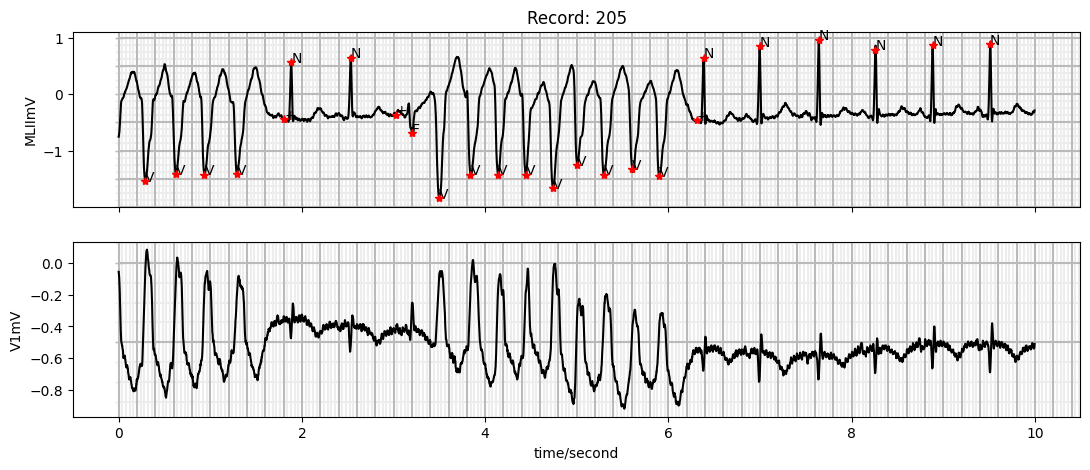

In [73]:
wfdb.plot_wfdb(record=ecg_record,
               annotation=ecg_annotation,
               figsize=(13, 5),
               time_units="seconds",
               ecg_grids="all",
               plot_sym=True,
               sig_style=["k-", "k-"])

## Resources

- Original Paper - https://www.sciencedirect.com/science/article/pii/S0167739X17324548?casa_token=VA3Pv9qqrogAAAAA:YbAYqiDGy785wc9Ic9y2RL4HYDy1UW82YxEtsJyuapNbCNDfwmtMiunBrhtIxBShCgAO2syS